In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']

In [5]:
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


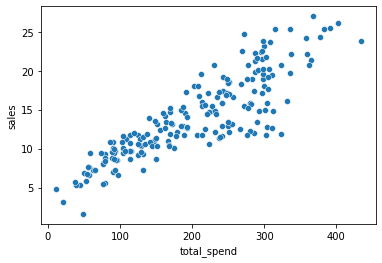

In [6]:
sns.scatterplot(data=df,x='total_spend',y='sales');

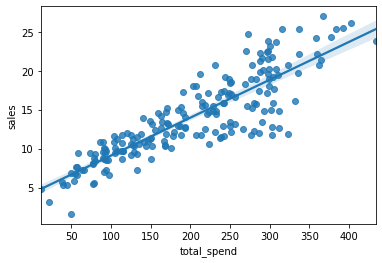

In [7]:
sns.regplot(data=df,x='total_spend',y='sales');

In [8]:
X = df['total_spend']
y = df['sales']

In [9]:
np.polyfit(X,y,deg=1)

array([0.04868788, 4.24302822])

In [10]:
potential_spend = np.linspace(0,500,100)

In [11]:
predicted_sales = 0.04868788*potential_spend + 4.24302822

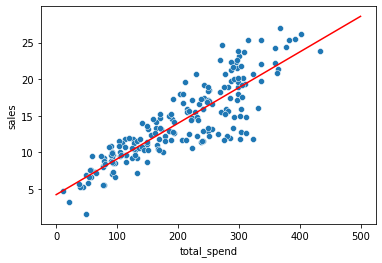

In [12]:
sns.scatterplot(data=df,x='total_spend',y='sales')
plt.plot(potential_spend,predicted_sales,color='red');

In [13]:
spend=200

predicted_sale = 0.04868788*spend + 4.24302822

In [14]:
predicted_sale

13.98060422

In [15]:
np.polyfit(X,y,3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [16]:
pot_spend = np.linspace(0,500,100)

In [17]:
pred_sales = 3.07615033e-07*pot_spend**3 + -1.89392449e-04*pot_spend**2 + 8.20886302e-02*pot_spend + 2.70495053e+00

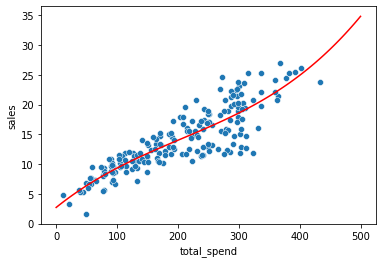

In [18]:
sns.scatterplot(data=df,x='total_spend',y='sales')
plt.plot(pot_spend,pred_sales,color='red');

In [19]:
df = pd.read_csv('Advertising.csv')

In [20]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


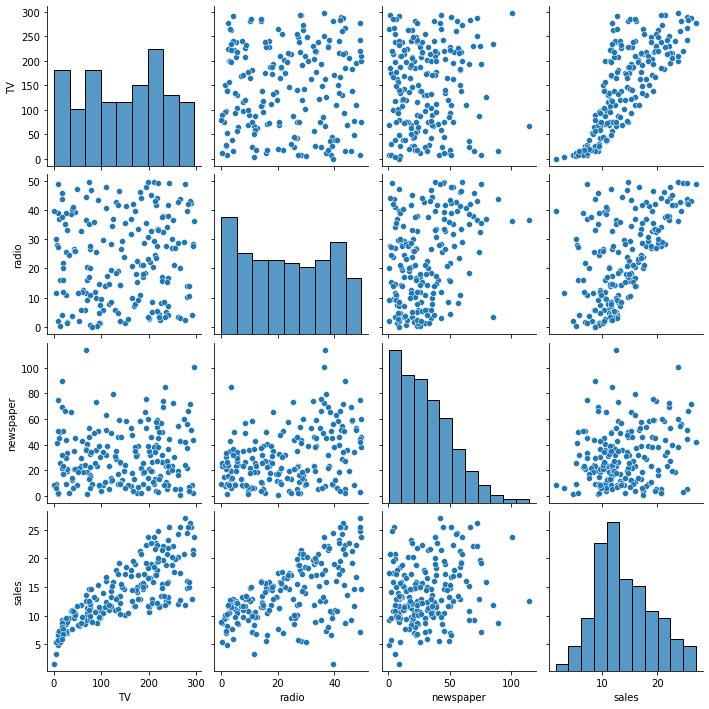

In [21]:
sns.pairplot(df)

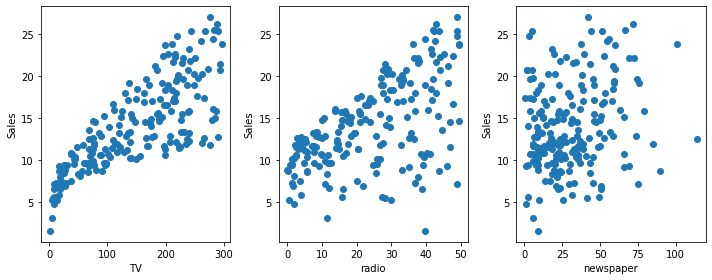

In [22]:
fig,ax = plt.subplots(1,3,figsize=(10,4))

ax[0].scatter(x=df['TV'],y=df['sales'])
ax[0].set_xlabel('TV')
ax[0].set_ylabel('Sales')

ax[1].scatter(x=df['radio'],y=df['sales'])
ax[1].set_xlabel('radio')
ax[1].set_ylabel('Sales')

ax[2].scatter(x=df['newspaper'],y=df['sales'])
ax[2].set_xlabel('newspaper')
ax[2].set_ylabel('Sales')

plt.tight_layout()
plt.show()

In [23]:
X = df.drop('sales',axis=1)

In [24]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [25]:
y = df['sales']

In [26]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [29]:
len(df)

200

In [30]:
X_train

,TV,radio,newspaper
85,193.2,18.4,65.7
183,287.6,43.0,71.8
127,80.2,0.0,9.2
53,182.6,46.2,58.7
100,222.4,4.3,49.8
...,...,...,...
63,102.7,29.6,8.4
70,199.1,30.6,38.7
81,239.8,4.1,36.9
11,214.7,24.0,4.0


In [31]:
X_test.shape

(60, 3)

In [32]:
y_train.shape

(140,)

In [33]:
y_test.shape

(60,)

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
model = LinearRegression()

In [36]:
model.fit(X_train,y_train)

LinearRegression()

In [37]:
test_predictions = model.predict(X_test)

In [38]:
test_predictions

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [39]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [40]:
df['sales'].mean()

14.0225

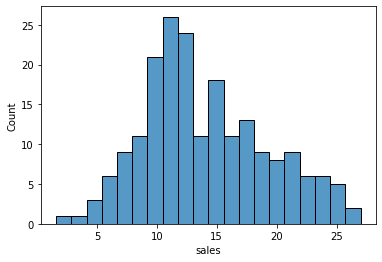

In [41]:
sns.histplot(data=df,x='sales',bins=20);

In [42]:
mean_absolute_error(y_test,test_predictions)

1.213745773614481

In [43]:
mean_squared_error(y_test,test_predictions)

2.2987166978863796

In [44]:
np.sqrt(mean_squared_error(y_test,test_predictions))

1.5161519375993884

In [45]:
r2_score(y_test,test_predictions)

0.9185780903322445

In [46]:
test_residuals = y_test - test_predictions

In [47]:
test_residuals

37    -1.041313
109    0.189374
31     0.451111
89    -0.308198
66     0.327143
119   -0.412483
54    -0.089925
74    -0.299540
145    0.524155
142    0.878058
148   -1.505032
112    0.207650
174   -2.225411
55     2.412060
141    0.775434
149    0.118016
25    -3.552290
34     1.810863
170    0.843850
39     1.096888
172   -0.192152
153    0.757859
175    2.313681
61     1.378009
65     1.320379
50    -1.252073
42    -0.769259
129    1.647714
179    0.176840
2     -3.207197
12    -1.577578
133    0.355399
90     1.129731
22    -1.107800
41    -0.214921
32     1.832357
125    1.346067
196    1.421653
158   -3.281056
180   -0.135911
16    -0.510026
186    0.528079
144    1.185301
121   -1.045720
80     0.232893
18     1.216320
78    -3.698066
48    -1.453889
4     -0.339423
15     1.585066
1     -2.097274
43    -1.066159
102   -2.762851
164    0.754630
9     -1.962615
155   -2.308703
36     2.105349
190   -1.824097
33    -1.374000
45    -0.287857
Name: sales, dtype: float64

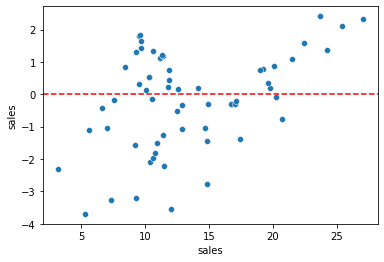

In [48]:
sns.scatterplot(x=y_test,y=test_residuals)
# plt.plot(y_test,np.zeros(len(y_test)),ls='--',color='red')
plt.axhline(y=0,ls='--',color='red');

<AxesSubplot:xlabel='sales', ylabel='Density'>

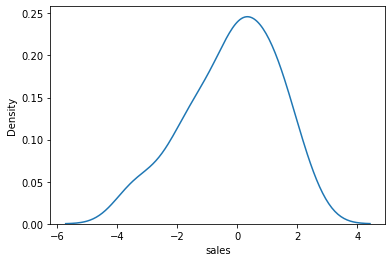

In [49]:
sns.kdeplot(test_residuals)

In [50]:
final_model = LinearRegression()

In [51]:
final_model.fit(X,y)

LinearRegression()

In [52]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [53]:
final_model.intercept_

2.938889369459414

In [54]:
final_model.predict([[193.2,18.4,65.7]])

array([15.18140789])

In [55]:
y_train[0]

22.1

In [56]:
my_pred = 0.04576465*193.2 + 0.18853002*18.4 - 0.00103749*65.7 + 2.938889369459414

In [57]:
my_pred

15.181409024459413

In [58]:
from joblib import dump,load

In [59]:
dump(final_model,'final_sales_model.joblib')

['final_sales_model.joblib']

In [60]:
loaded_model = load('final_sales_model.joblib')

In [61]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [62]:

campaign = [[149,22,12]]

In [63]:
loaded_model.predict(campaign)

array([13.893032])

In [64]:
df = pd.read_csv("Advertising.csv")

In [65]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [66]:
X = df.drop('sales',axis=1)

In [67]:
y= df['sales']

In [68]:
from sklearn.preprocessing import PolynomialFeatures

In [70]:
polynomial_converter = PolynomialFeatures(2,include_bias=False)

In [71]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [74]:
poly_features = polynomial_converter.transform(X)

In [75]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [77]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [78]:
poly_features = polynomial_converter.fit_transform(X)

In [79]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(poly_features,y,test_size=0.3, random_state=101)

In [82]:
from sklearn.linear_model import LinearRegression

In [83]:
model = LinearRegression()

In [84]:
model.fit(X_train,y_train)

LinearRegression()

In [85]:
test_prediction = model.predict(X_test)

In [86]:
 model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [87]:
model.intercept_

5.12555742313269

In [88]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [89]:
MAE = mean_absolute_error(y_test,test_prediction)

In [90]:
MSE = mean_squared_error(y_test,test_prediction)

In [91]:
RMSE = np.sqrt(MSE)

In [95]:
R2 = r2_score(y_test,test_prediction)

In [92]:
MAE

0.48967980448035886

In [93]:
MSE

0.44175055104033895

In [94]:
RMSE

0.6646431757269

In [96]:
R2

0.9843529333146795

In [97]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [98]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [100]:
np.sum(poly_features[0]*model.coef_)+ model.intercept_

21.861906993140323

In [101]:
model.predict([poly_features[0]])

array([21.86190699])

In [102]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1,10):
    poly_converter = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = poly_converter.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_features,y,test_size=0.3, random_state=101)

    model = LinearRegression()
    model.fit(X_train,y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train,train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test,test_pred))

    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)



In [103]:
train_rmse_errors

[1.7345941243293763,
 0.5879574085292234,
 0.4339344356902067,
 0.3517083688399345,
 0.25093429203558393,
 0.1940630535738855,
 5.4217058914650815,
 0.1432051307596778,
 0.17251520466225526]

In [104]:
test_rmse_errors

[1.5161519375993882,
 0.6646431757269,
 0.5803286825225046,
 0.5077742636722449,
 2.5758181645300047,
 4.305903206969613,
 1379.0990147451769,
 4212.9967596479455,
 95995.41492818364]

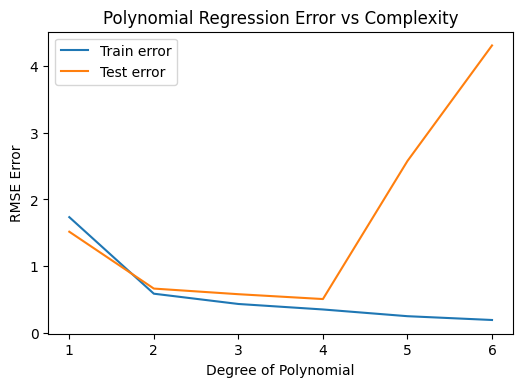

In [119]:
plt.figure(dpi=100)
plt.plot(np.arange(1,7),train_rmse_errors[:6],label='Train error')
plt.plot(np.arange(1,7),test_rmse_errors[:6],label='Test error')
plt.ylabel('RMSE Error')
plt.xlabel('Degree of Polynomial')
plt.legend()
plt.title("Polynomial Regression Error vs Complexity");

In [120]:
final_poly_converter = PolynomialFeatures(degree=3, include_bias=False)

In [121]:
final_model = LinearRegression()

In [122]:
full_converted_X = final_poly_converter.fit_transform(X)
final_model.fit(full_converted_X,y)

LinearRegression()

In [123]:
from joblib import dump,load

In [124]:
dump(final_model,'final_poly_model.joblib')

['final_poly_model.joblib']

In [125]:
dump(final_poly_converter,'final_converter.joblib')

['final_converter.joblib']

In [126]:
loaded_converter = load('final_converter.joblib')

In [127]:
loaded_model = load('final_poly_model.joblib')

In [128]:
campaign = [[149,22,12]]

In [130]:
transformed_data = loaded_converter.fit_transform(campaign)

In [131]:
loaded_model.predict(transformed_data)

array([14.64501014])

In [132]:
df = pd.read_csv("Advertising.csv")

In [138]:
X = df.drop('sales',axis=1)

In [139]:
y = df['sales']

In [140]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter = PolynomialFeatures(degree=3,include_bias=False)

In [141]:
poly_features = polynomial_converter.fit_transform(X)

In [142]:
poly_features.shape

(200, 19)

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [145]:
X_train.shape

(140, 19)

In [146]:
from sklearn.preprocessing import StandardScaler

In [147]:
scaler = StandardScaler()

In [148]:
scaler.fit(X_train)

StandardScaler()

In [149]:
X_train = scaler.transform(X_train)

In [150]:
X_test = scaler.transform(X_test)

In [151]:
X_train[0]

array([ 0.49300171, -0.33994238,  1.61586707,  0.28407363, -0.02568776,
        1.49677566, -0.59023161,  0.41659155,  1.6137853 ,  0.08057172,
       -0.05392229,  1.01524393, -0.36986163,  0.52457967,  1.48737034,
       -0.66096022, -0.16360242,  0.54694754,  1.37075536])

In [152]:
poly_features[0]

array([2.30100000e+02, 3.78000000e+01, 6.92000000e+01, 5.29460100e+04,
       8.69778000e+03, 1.59229200e+04, 1.42884000e+03, 2.61576000e+03,
       4.78864000e+03, 1.21828769e+07, 2.00135918e+06, 3.66386389e+06,
       3.28776084e+05, 6.01886376e+05, 1.10186606e+06, 5.40101520e+04,
       9.88757280e+04, 1.81010592e+05, 3.31373888e+05])

In [153]:
from sklearn.linear_model import Ridge

In [155]:
ridge_model = Ridge(alpha=10)

In [156]:
ridge_model.fit(X_train,y_train)

Ridge(alpha=10)

In [157]:
test_predictions = ridge_model.predict(X_test)

In [158]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [159]:
MAE = mean_absolute_error(y_test,test_predictions)

In [160]:
MAE

0.5774404204714169

In [161]:
RMSE = np.sqrt(mean_squared_error(y_test,test_predictions))

In [162]:
RMSE

0.8946386461319648

In [163]:
from sklearn.linear_model import RidgeCV

In [169]:
ridge_cv_model = RidgeCV(alphas=(0.1,1,10), scoring="neg_mean_absolute_error")

In [170]:
ridge_cv_model.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), scoring='neg_mean_absolute_error')

In [171]:
ridge_cv_model.alpha_

0.1

In [172]:
from sklearn.metrics import SCORERS

In [173]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [174]:
test_predictions = ridge_cv_model.predict(X_test)

In [175]:
MAE = mean_absolute_error(y_test,test_predictions)

In [176]:
MAE

0.42737748843510037

In [195]:
RMSE = np.sqrt(mean_squared_error(y_test,test_predictions))

In [178]:
RMSE

0.6180719926948979

In [179]:
ridge_cv_model.coef_

array([ 5.40769392,  0.5885865 ,  0.40390395, -6.18263924,  4.59607939,
       -1.18789654, -1.15200458,  0.57837796, -0.1261586 ,  2.5569777 ,
       -1.38900471,  0.86059434,  0.72219553, -0.26129256,  0.17870787,
        0.44353612, -0.21362436, -0.04622473, -0.06441449])

In [180]:
ridge_cv_model.intercept_

14.311428571428573

In [183]:
from sklearn.linear_model import LassoCV

In [199]:
lasso_cv_model = LassoCV(eps=0.001,n_alphas=100,cv=5,max_iter=100000)

In [200]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(cv=5, max_iter=100000)

In [201]:
lasso_cv_model.alpha_

0.004943070909225833

In [202]:
test_predictions = lasso_cv_model.predict(X_test)

In [203]:
MAE = mean_absolute_error(y_test,test_predictions)

In [204]:
MAE

0.4335034618590078

In [205]:
RMSE = np.sqrt(mean_squared_error(y_test,test_predictions))

In [206]:
RMSE

0.6063140748984043

In [207]:
lasso_cv_model.coef_

array([ 4.86023329,  0.12544598,  0.20746872, -4.99250395,  4.38026519,
       -0.22977201, -0.        ,  0.07267717, -0.        ,  1.77780246,
       -0.69614918, -0.        ,  0.12044132, -0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        ])

In [208]:
from sklearn.linear_model import ElasticNetCV

In [209]:
elastic_cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1],eps=0.001,n_alphas=100,max_iter=1000000)

In [210]:
elastic_cv_model.fit(X_train,y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=1000000)

In [211]:
elastic_cv_model.l1_ratio

[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]

In [212]:
elastic_cv_model.l1_ratio_

1.0

In [213]:
elastic_cv_model.alpha_

0.004943070909225833

In [214]:
test_predictions = elastic_cv_model.predict(X_test)

In [215]:
MAE = mean_absolute_error(y_test,test_predictions)

In [216]:
MAE

0.4335034618590078

In [217]:
RMSE = np.sqrt(mean_squared_error(y_test,test_predictions))

In [218]:
RMSE

0.6063140748984043